In [1]:
#Author : Vijayendra Shrivastava
#E-mail : vijayendra05@gmail.com
#The algorithm is used for detecting the Employee Attrition in HR dataset

In [2]:
import time
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix

In [3]:
hr_df = pd.read_csv("HR_Employee_Attrition_Data.csv")
pd.set_option('display.max_columns', 500)
pd.set_option('display.max_rows', 500)
hr_df

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Y,Yes,11,3,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,Y,No,23,4,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,3,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Y,Yes,15,3,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,4,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Y,Yes,11,3,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,5,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,Y,No,12,3,4,80,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2935,36,No,Travel_Frequently,884,Research & Development,23,2,Medical,1,2936,3,Male,41,4,2,Laboratory Technician,4,Married,2571,12290,4,Y,No,17,3,3,80,1,17,3,3,5,2,0,3
2936,39,No,Travel_Rarely,613,Research & Development,6,1,Medical,1,2937,4,Male,42,2,3,Healthcare Representative,1,Married,9991,21457,4,Y,No,15,3,1,80,1,9,5,3,7,7,1,7
2937,27,No,Travel_Rarely,155,Research & Development,4,3,Life Sciences,1,2938,2,Male,87,4,2,Manufacturing Director,2,Married,6142,5174,1,Y,Yes,20,4,2,80,1,6,0,3,6,2,0,3
2938,49,No,Travel_Frequently,1023,Sales,2,3,Medical,1,2939,4,Male,63,2,2,Sales Executive,2,Married,5390,13243,2,Y,No,14,3,4,80,0,17,3,2,9,6,0,8


In [8]:
hr_df.describe()

,Age,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,2940.000000,2940.000000,2940.000000,2940.000000,2940.000000,2940.000000,2940.000000,2940.000000,2940.000000,2940.000000,2940.000000,2940.000000,2940.000000,2940.000000,2940.000000,2940.000000,2940.000000,2940.000000,2940.000000,2940.000000,2940.000000,2940.000000,2940.000000
mean,36.923810,802.485714,9.192517,2.912925,2.721769,65.891156,2.729932,2.063946,2.728571,6502.931293,14313.103401,2.693197,15.209524,3.153741,2.712245,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.133819,403.440447,8.105485,1.023991,1.092896,20.325969,0.711440,1.106752,1.102658,4707.155770,7116.575021,2.497584,3.659315,0.360762,1.081025,0.851932,7.779458,1.289051,0.706356,6.125483,3.622521,3.221882,3.567529
min,18.000000,102.000000,1.000000,1.000000,1.000000,30.000000,1.000000,1.000000,1.000000,1009.000000,2094.000000,0.000000,11.000000,3.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,2.000000,48.000000,2.000000,1.000000,2.000000,2911.000000,8045.000000,1.000000,12.000000,3.000000,2.000000,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,3.000000,66.000000,3.000000,2.000000,3.000000,4919.000000,14235.500000,2.000000,14.000000,3.000000,3.000000,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,4.000000,84.000000,3.000000,3.000000,4.000000,8380.000000,20462.000000,4.000000,18.000000,3.000000,4.000000,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,4.000000,100.000000,4.000000,5.000000,4.000000,19999.000000,26999.000000,9.000000,25.000000,4.000000,4.000000,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


In [4]:
# Basic statistics of categorical features actually ordered categorical variables
hr_df.describe(include=[np.object])

,Attrition,BusinessTravel,Department,EducationField,Gender,JobRole,MaritalStatus,Over18,OverTime
count,2940,2940,2940,2940,2940,2940,2940,2940,2940
unique,2,3,3,6,2,9,3,1,2
top,No,Travel_Rarely,Research & Development,Life Sciences,Male,Sales Executive,Married,Y,No
freq,2466,2086,1922,1212,1764,652,1346,2940,2108


In [6]:
# Over18 has only one unique value which represents all employees are above 18 years of age.
hr_df.drop(['EmployeeCount','StandardHours','Over18','EmployeeNumber'],axis=1,inplace=True)

In [11]:
cat_col_names = hr_df.select_dtypes(include=[np.object]).columns.tolist() # Get categorical feature names
cat_col_names

['Attrition',
 'BusinessTravel',
 'Department',
 'EducationField',
 'Gender',
 'JobRole',
 'MaritalStatus',
 'OverTime']

In [7]:
def preprocessor(df):
    res_df = df.copy()
    le = preprocessing.OneHotEncoder()
    res_df['BusinessTravel'] = le.fit_transform(res_df['BusinessTravel'])
    res_df['Department'] = le.fit_transform(res_df['Department'])
    res_df['EducationField'] = le.fit_transform(res_df['EducationField'])
    res_df['MaritalStatus'] = le.fit_transform(res_df['MaritalStatus'])
    res_df['JobRole'] = le.fit_transform(res_df['JobRole'])
    res_df['Gender'] = le.fit_transform(res_df['Gender'])
    res_df['OverTime'] = le.fit_transform(res_df['OverTime'])
    return res_df

In [13]:
# df = preprocessor(hr_df)
df = hr_df.copy()

### Exploratory Data Analysis

In [14]:
# Check Null value count
df.isnull().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSinceLastPromotion     0
YearsWithCurrManager        0
dtype: int64

### Drop constant values columns

In [16]:
# corr_matrix = df.corr().abs()
# corr_matrix

In [ ]:
# corr_matrix.dropna(axis=1,how='all',inplace=True)
# corr_matrix.dropna(axis=0,how='all',inplace=True)
Na_list = df.columns[corr_matrix.isna().all(axis=1)].tolist()

In [ ]:
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape),k=1).astype(np.bool))
upper

In [ ]:
to_drop = [col for col in upper.columns if any(upper[col]>.80)]
to_drop.extend(Na_list)
to_drop

In [ ]:
df.drop(to_drop, axis=1, inplace=True)

2940


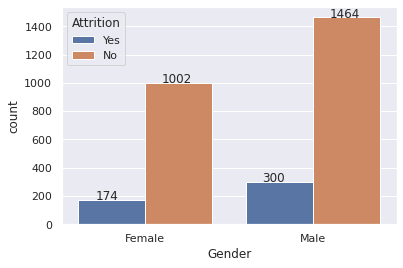

In [71]:
# Get total no of Employee attrition
sns.set(font_scale=1)
# descending_order = df['Attrition'].value_counts().sort_values(ascending=False).index
print(df.Gender.count())
ax = sns.countplot(x=df.Gender,data=df,hue=df.Attrition)
for p in ax.patches:
        ax.annotate('{:}'.format(p.get_height()), (p.get_x()+0.1, p.get_height()))


In [ ]:
# Get Percentage of Employee attrition with respect to each categorical features.
plt.figure(figsize=(10,5))
for cols in cat_col_names:
    total = float(len(df[cols]))
    ax = sns.countplot(x=cols,data=df,hue=df.Attrition)
    for p in ax.patches:
            percentage = '{:.1f}%'.format(100 * p.get_height()/total)
            x = p.get_x() + p.get_width()
            y = p.get_height()
            ax.annotate(percentage, (x, y),ha='center')
            labels = ax.get_xticklabels()
            ax.set_xticklabels(labels, rotation=45) # set new labels
    plt.show()
# As below bar shows that high rate of Attrition Travel_rarely,R&D,Medical-Life science,Male, Single

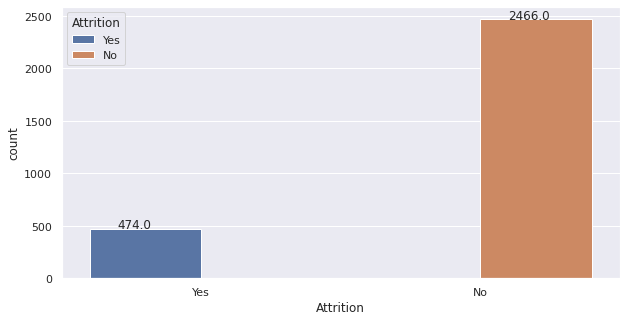

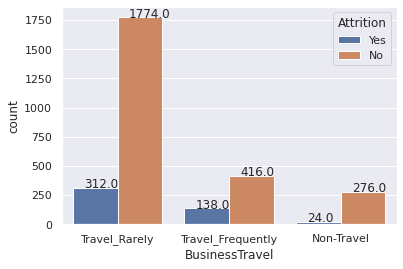

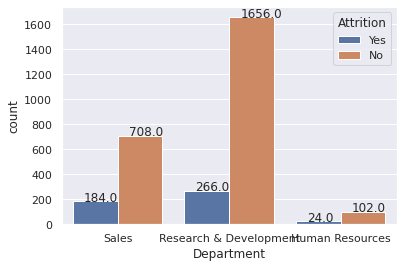

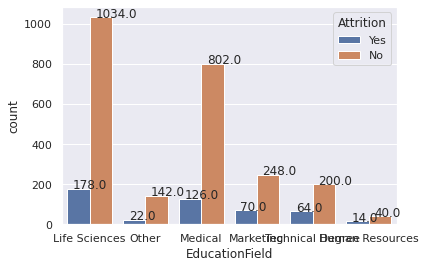

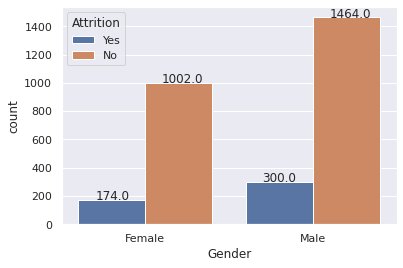

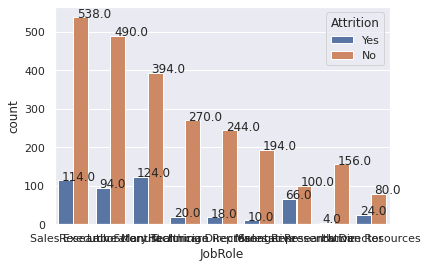

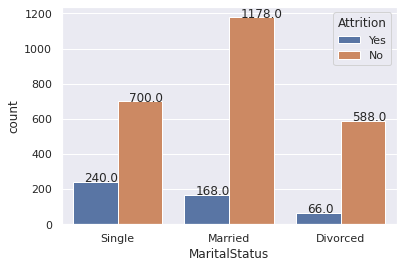

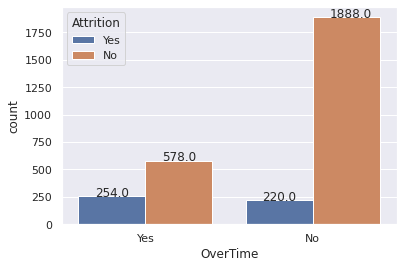

In [36]:
# df.head()
plt.figure(figsize=(10,5))
for cols in cat_col_names:
    ax = sns.countplot(x=cols,data=df,hue=df.Attrition)
    for p in ax.patches:
            ax.annotate('{:.1f}'.format(p.get_height()), (p.get_x()+0.1, p.get_height()))
    plt.show()

In [ ]:
# Get total no of Employee attrition
sns.countplot(x=df.Attrition,data=df,hue=df.Gender)
plt.grid()
# Male employee have attrition compare to female

In [ ]:
# Get Job satisfation and year at company with respect to Employee attrition
sns.barplot(x=df.YearsInCurrentRole,y=df.YearsWithCurrManager,data=df,hue=df.Attrition)
plt.grid()
# Employee with less Job satisfation and less stability in company, they have more attrition.

In [ ]:
# Get Job satisfation and year at company with respect to Employee attrition
sns.barplot(x=df.YearsSinceLastPromotion,y=df.YearsAtCompany,data=df,hue=df.Attrition)
plt.grid()
# Employee with less experience attrition is more.

In [ ]:
x = df.drop(['Attrition'],axis =1).values
y = df['Attrition'].values

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size =0.2)

In [ ]:
fit_dt = DecisionTreeClassifier()

In [ ]:
np.random.seed(42)
start = time.time()

param_dist = {'max_depth': range(1,20,2),
              'splitter': ['best', 'random'],
              'max_features': ['auto', 'sqrt', 'log2', None],
              'min_samples_leaf':range(1,20,2),
              'min_samples_split':range(1,20,2),
              'criterion': ['gini', 'entropy']}

cv_dt = GridSearchCV(fit_dt, cv = 10,
                     param_grid=param_dist, 
                     n_jobs = 4)

cv_dt.fit(x_train, y_train)
print('Best Parameters using grid search: \n', cv_dt.best_params_)
print('Best score: {}'.format(cv_dt.best_score_))
dtc = cv_dt.best_estimator_
print(dtc)
end = time.time()
print('Time taken in grid search: {0: .2f}'.format(end - start))

In [ ]:
# def model_var(n):
    # Decision tree with depth = 2
# model_dt = DecisionTreeClassifier(random_state=1, max_depth=9,criterion='gini',min_samples_split=3)
model_dt = dtc
model_dt.fit(x_train, y_train)
model_dt_score_train = model_dt.score(x_train, y_train)
print("Training score: ",model_dt_score_train)
model_dt_score_test = model_dt.score(x_test, y_test)
print("Testing score: ",model_dt_score_test)
#y_pred_dt = model_dt_2.predict_proba(x_test)[:, 1]
# print("Iteration = ",n)

## Performance Metrics

In [ ]:
pred = cv_dt.predict(x_test)
pred

In [ ]:
print (confusion_matrix(y_test, pred))
# With EDA
# [[483  16]
#  [ 30  59]]

In [ ]:
def evaluate_model_score(X, y, scoring='accuracy'):
    logreg_model = LogisticRegression(random_state=0)
    rfc_model = RandomForestClassifier()
    dt_model = DecisionTreeClassifier()
    models = [logreg_model, dt_model, rfc_model]
    model_results = pd.DataFrame(columns = ["Model", "Accuracy", "Precision", "CV Score","F1 Score","ROC Score"])
    for model in models:
        model.fit(X, y,)
        y_pred = model.predict(X)
        score = cross_val_score(model, X, y, cv=10, scoring=scoring)
        model_roc_score,accuracy,precision,recall,f1_score = gen_model_performance(y, y_pred)
        scores = cross_val_score(model, X, y, cv=5)
        model_results = model_results.append({"Model": model.__class__.__name__,
                              "Accuracy": accuracy, "Precision": precision,
                              "CV Score": scores.mean()*100.0,"F1 Score": f1_score,
                              "ROC Score": model_roc_score}, ignore_index=True)
    return model_results